<a href="https://colab.research.google.com/github/tirth-jarsania/Deep-Learning/blob/main/mpneuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data

In [1]:
import sklearn.datasets as sd
import numpy as np

In [2]:
bc = sd.load_breast_cancer()
X = bc.data
Y = bc.target

In [3]:
print(X.shape)
print(Y.shape)
type(X)

(569, 30)
(569,)


numpy.ndarray

In [4]:
import pandas as pd

data = pd.DataFrame(X , columns= bc.feature_names )
data['class'] = Y

In [5]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# test the data

In [8]:
# most important package which split the data into train and test data
# so here we have require it so import here

from sklearn.model_selection import train_test_split

In [9]:
X = data.drop('class',axis = 1)
Y = data['class']

In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.09 ,stratify=Y)

In [12]:
print(X.shape , X_train.shape , X_test.shape )

(569, 30) (517, 30) (52, 30)


In [13]:
print(Y.mean(), Y_train.mean() , Y_test.mean())

0.6274165202108963 0.6266924564796905 0.6346153846153846


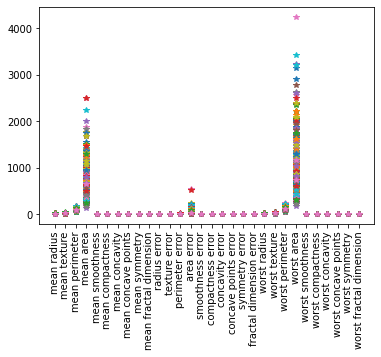

In [14]:
import matplotlib.pyplot as plt
plt.plot( X_train.T , '*')
plt.xticks(rotation = 'vertical')
plt.show()

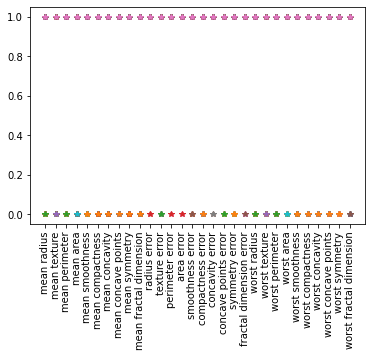

In [15]:
X_binarized_train = X_train.apply( pd.cut , bins = 2 , labels =[1,0])
plt.plot( X_binarized_train.T , '*')
plt.xticks(rotation = 'vertical')
plt.show()

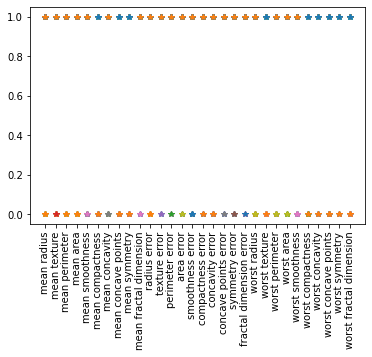

pandas.core.frame.DataFrame

In [16]:
X_binarized_test = X_test.apply( pd.cut , bins = 2 , labels =[1,0])
plt.plot( X_binarized_test.T , '*')
plt.xticks(rotation = 'vertical')
plt.show()
type( X_binarized_test)

In [17]:
X_binarized_train = X_binarized_train.values
X_binarized_test = X_binarized_test.values

In [18]:
type(X_binarized_test)

numpy.ndarray

In [19]:
#now we go through mp neuron model
from random import randint
b = 3
i = randint( 0, X_binarized_train.shape[0] )
print(i)
if np.sum(X_binarized_train[i, :]) >= b :
  print( 'MP Neuron inference is malignant' )
else :
  print( 'MP Neuron inference is benign' )

if Y_train[i] == 1:
  print( 'Ground truth is malignant' )
else :
  print( 'Ground truth is benign' )



255
MP Neuron inference is malignant
Ground truth is benign


In [20]:
# try to getting best b for this model

for b in range(X_binarized_train.shape[1] + 1):
  isMatch = 0;

  for x,y in zip(X_binarized_train , Y_train):
    isMatch += ((np.sum(x) >= b) == y)
  
  print( b , isMatch / X_binarized_train.shape[0])

0 0.6266924564796905
1 0.6266924564796905
2 0.6266924564796905
3 0.6266924564796905
4 0.6266924564796905
5 0.6266924564796905
6 0.6266924564796905
7 0.6266924564796905
8 0.6266924564796905
9 0.6266924564796905
10 0.6266924564796905
11 0.6266924564796905
12 0.6266924564796905
13 0.6286266924564797
14 0.632495164410058
15 0.6382978723404256
16 0.6441005802707931
17 0.6537717601547389
18 0.6595744680851063
19 0.6615087040618955
20 0.6750483558994197
21 0.6924564796905223
22 0.7137330754352031
23 0.7369439071566731
24 0.781431334622824
25 0.804642166344294
26 0.8413926499032882
27 0.8588007736943907
28 0.8549323017408124
29 0.7911025145067698
30 0.6711798839458414


In [21]:
# we show that b=28 we get maximize accuracy so we check in test data
from sklearn.metrics import accuracy_score

for b in range(X_binarized_test.shape[1] + 1):
      y_pred = []

      for x in (X_binarized_test ) :
        y_pred.append( ((np.sum(x))>=b)  )

      accuracy = accuracy_score(y_pred , Y_test)

      print(b , accuracy)


0 0.6346153846153846
1 0.6346153846153846
2 0.6346153846153846
3 0.6346153846153846
4 0.6346153846153846
5 0.6346153846153846
6 0.6346153846153846
7 0.6346153846153846
8 0.6538461538461539
9 0.6538461538461539
10 0.6538461538461539
11 0.6730769230769231
12 0.6730769230769231
13 0.7115384615384616
14 0.7115384615384616
15 0.7307692307692307
16 0.7307692307692307
17 0.75
18 0.7884615384615384
19 0.8076923076923077
20 0.8269230769230769
21 0.8076923076923077
22 0.8846153846153846
23 0.8846153846153846
24 0.9230769230769231
25 0.9230769230769231
26 0.8846153846153846
27 0.8846153846153846
28 0.8461538461538461
29 0.7692307692307693
30 0.6538461538461539


# **MP Neuron**


In [22]:

#define MPNeuron 

class MPNeuron :

  def __init__(self):
    self.b = None

  def model(self , x):
    return (sum(x) >= self.b)

  def predict(self , X):
    Y = []
    for x in X:
      Y.append( self.model(x) )
    return np.array(Y)

  def fit(self , X, Y):
    accuracy = {}  # for each b we get that accuracy

    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X) 
      accuracy[b] = accuracy_score( Y_pred , Y )
    
    best_b = max( accuracy, key = accuracy.get )
    self.b = best_b

    print("Optimal value of the b :" , self.b)
    print("Highest accuracy in the training dataset : " , accuracy[self.b])




In [23]:
mp_neuron = MPNeuron()
mp_neuron.fit( X_binarized_train , Y_train)

Optimal value of the b : 27
Highest accuracy in the training dataset :  0.8588007736943907


# Perceptron#

In [27]:
# in the MPNeuron class b must be natural number so we can afford in learning algorithm as a bruteforce solution , where here w vector and b contains any real value so we follow particular learning algo
class Perceptron:

  def __init__(self):
    self.b = None
    self.w = None

  def model(self, x):
    if (np.dot( self.w , x ) >= self.b):
      return 1;
    return 0

  def predict(self , X):
    Y = []
    for x in X:
      Y.append(self.model(x))
    return np.array(Y)

  def fit(self , X, Y , epochs = 1 , learning_rate = 1):
    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = np.ones(epochs)
    mx_accuracy = 0.0
    index = 0
    best_w = None
    best_b = None

    w_matrix = []
    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred = self.model(x)

        if y != y_pred :
          if y == 1 :
            self.w = self.w + learning_rate * x
            self.b = self.b + learning_rate
          else:
            self.w = self.w - learning_rate * x
            self.b = self.b - learning_rate
      accuracy[i] = self.getAccuracy(X,Y)
      w_matrix.append( self.w )
      if mx_accuracy < accuracy[i] :
        mx_accuracy = accuracy[i]
        index = i
        best_w = self.w
        best_b = self.b

    self.w = best_w
    self.b = best_b
    print('mx_accuracy = ' , mx_accuracy)
    print('index = ' , index)

    plt.plot(accuracy ,'*' )
    plt.ylim([0,1])
    plt.show() 

    return np.array(w_matrix)

  def getAccuracy(self , X, Y):
    y_pred = self.predict(X)
    accuracy = accuracy_score(y_pred , Y)
    return accuracy
    #print(accuracy)
      

In [28]:
perceptron = Perceptron()

mx_accuracy =  0.9400386847195358
index =  18


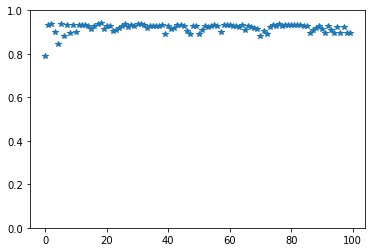

In [30]:
w_matrix = perceptron.fit(X_binarized_train ,Y_train,100)

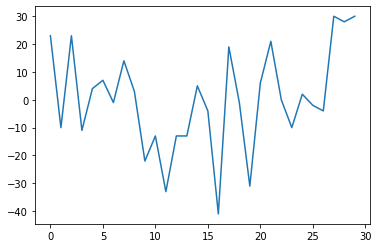

In [31]:
plt.plot(w_matrix[-1 ,:])
plt.show()

In [33]:
print( perceptron.getAccuracy( X_binarized_test , Y_test ) )

0.8653846153846154
